In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.test.gpu_device_name() #run to make sure tensorflow is connected to gpu

''

In [2]:
import numpy as np
import pandas as pd
import cv2  
import os  
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
%matplotlib inline

In [3]:
image =imread('data/DOMINO PHOTOS/10-11.png')

In [4]:
image.shape

(102, 54, 4)

In [5]:
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

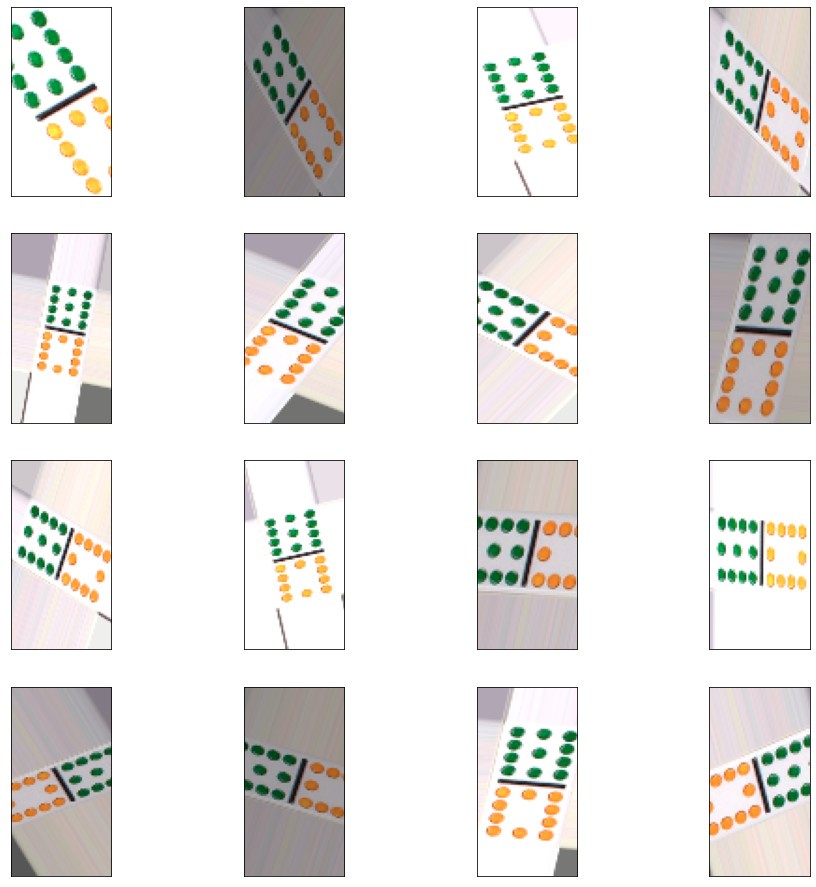

In [6]:
data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0, zoom_range=[-1,- 2])
data_generator.fit(images)
image_iterator = data_generator.flow(images)


plt.figure(figsize=(16,16))
for i in range(16):
    
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_iterator.next()[0].astype('int'))
plt.show()

In [7]:
data=[]

for i, img in (enumerate(os.listdir('data/DOMINO PHOTOS/'))):
    label=i
    
    img = cv2.imread('data/DOMINO PHOTOS/'+img, cv2.IMREAD_GRAYSCALE)
    #img = [x for x in img if x is not None]
    cv2.imshow('image',img)
    #img = cv2.resize(img, (180, 180))
    imgs = img.reshape((1, img.shape[0], img.shape[1], 1))
    data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0, zoom_range=[-1,-3])
    data_generator.fit(imgs)
    image_iterator = data_generator.flow(imgs)
    
    for x in range(150):
        img_transformed=image_iterator.next()[0].astype('int')/255
        data.append([img_transformed, label])
    #print(img)
shuffle(data)

In [8]:
data[0][1]

65

In [9]:
import pandas as pd

In [10]:
imagelist=[]
for i, img in (enumerate(os.listdir('data/DOMINO PHOTOS/'))):
    
    img=img[:-4]
    imagelist.append(img)
    
    

In [11]:
imagelist

['1-8',
 '11-11',
 '4-12',
 '8-12',
 '1-9',
 '3-9',
 '8-10',
 '4-10',
 '11-12',
 '4-11',
 '8-11',
 '3-8',
 '6-10',
 '7-8',
 '7-9',
 '6-11',
 '5-9',
 '5-8',
 '6-12',
 '2-11',
 '2-9',
 '2-8',
 '2-10',
 '2-12',
 '0-8',
 '0-9',
 '4-9',
 '0-12',
 '4-8',
 '6-8',
 '0-11',
 '0-10',
 '6-9',
 '5-11',
 '4-6',
 '9-11',
 '0-2',
 '9-10',
 '0-3',
 '10-12',
 '4-7',
 '5-10',
 '5-12',
 '6-7',
 '8-8',
 '10-10',
 '4-5',
 '2-3',
 '0-1',
 '9-12',
 '0-0',
 '2-2',
 '4-4',
 '10-11',
 '8-9',
 '6-6',
 '2-6',
 '0-4',
 '7-12',
 '0-5',
 '2-7',
 '2-5',
 '0-7',
 '7-11',
 '7-10',
 '0-6',
 '12-12',
 '2-4',
 '1-1',
 '3-3',
 '5-5',
 '7-7',
 '9-9',
 '3-12',
 '1-2',
 '3-10',
 '5-6',
 '5-7',
 '3-11',
 '1-3',
 '1-7',
 '3-5',
 '1-10',
 '1-11',
 '3-4',
 '1-6',
 '1-4',
 '3-6',
 '1-12',
 '3-7',
 '1-5']

In [12]:
df=pd.DataFrame(imagelist)

In [13]:
df

,0
0,1-8
1,11-11
2,4-12
3,8-12
4,1-9
...,...
86,1-4
87,3-6
88,1-12
89,3-7


In [14]:
df[0][9]

'4-11'

In [15]:
df.to_csv('dominos9.csv')

In [16]:
np.save('/Users/kyleblack/desktop/DOMINOS/data/Aug_Data/data9.npy',data)

/Users/kyleblack/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [25]:
data = np.load('/Users/kyleblack/desktop/DOMINOS/data/Aug_Data/data9.npy', allow_pickle =True)

In [26]:
data[3]

array([array([[[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]]),
       19], dtype=object)

In [27]:
data.shape

(13650, 2)

In [21]:
train =data[:6600]
test=data[6600:]

In [22]:
train_X=[]
train_y=[]
for x in train:
    train_X.append(x[0]) 
    train_y.append(x[1])
    
test_X=[]
test_y=[]
for x in test:
    test_X.append(x[0]) 
    test_y.append(x[1])

In [23]:
train_X=np.array(train_X)
train_y=np.array(train_y)

test_X=np.array(test_X)
test_y=np.array(test_y)

<ipython-input-23-301751b7d23e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  train_X=np.array(train_X)
<ipython-input-23-301751b7d23e>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  test_X=np.array(test_X)


In [24]:
train_X.shape

(6600,)

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

epochs=250
batch_size=32

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(train_X.shape[1], train_X.shape[2], train_X.shape[3])),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(91, activation='softmax')
])

model.summary()

cp = tf.keras.callbacks.ModelCheckpoint(filepath="250epochs_conv.h5",
                               save_best_only=True,
                               verbose=0)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, 
                    validation_data=(test_X, test_y), callbacks=[cp]).history